In [1]:
import pandas as pd
import numpy as np
import os

# Change working directory to project root directory
os.chdir(os.path.abspath(os.path.join(os.getcwd(), "..")))
print(f"Changed working directory to: {os.getcwd()}")

# Get absolute paths for data
project_root = "/Users/oliulv/Documents/foak"
data_path = os.path.join(project_root, "data", "BTCUSDT_1h_1h-pump05_170715_250302.csv")

# Load our data into df
df = pd.read_csv(data_path, parse_dates=["timestamp"])

df.head()

Changed working directory to: /Users/oliulv/Documents/foak


,timestamp,open,high,low,close,volume,num_trades,taker_buy_base,taker_buy_quote,label,...,volatility_cluster,buy_sell_ratio,bid_ask_spread,depth_imbalance,fractal_dimension,fib_retrace_38,fib_retrace_50,order_flow_imbalance,rolling_kurtosis,lunar_phase
0,2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009,171.0,35.160503,150952.477943,0,...,NaN,2.925044,0.012138,0.745226,NaN,NaN,NaN,0.490452,NaN,0.586207
1,2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916,102.0,21.448071,92608.279728,0,...,NaN,12.003319,0.008648,0.923097,NaN,NaN,NaN,0.846193,NaN,0.586207
2,2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691,36.0,4.802861,20795.317224,0,...,NaN,1.979068,0.008343,0.664325,NaN,NaN,NaN,0.328649,NaN,0.586207
3,2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249,25.0,2.602292,11291.347015,0,...,NaN,1.413554,0.014386,0.585673,NaN,NaN,NaN,0.171346,NaN,0.586207
4,2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807,28.0,0.814655,3552.746817,0,...,NaN,5.151089,0.010212,0.837427,NaN,NaN,NaN,0.674854,NaN,0.586207


In [2]:
from utils.model.model_manager import ModelManager

# Initialize model manager 
symbol = "BTCUSDT"
start_date = "2017-07-15"
end_date = "2025-03-02"
manager = ModelManager(symbol, start_date, end_date)

# Load data into manager
manager.load_data(custom_path=data_path)

# Split and prepare data
test_window_days = 30
manager.split_data(test_window_days)

🕵️♂️ Dataset loaded successfully
📊 Data split completed


(            open       high        low      close       volume  num_trades  \
 0        4261.48    4313.62    4261.32    4308.83    47.181009       171.0   
 1        4308.83    4328.69    4291.37    4315.32    23.234916       102.0   
 2        4330.29    4345.45    4309.37    4324.35     7.229691        36.0   
 3        4316.62    4349.99    4287.41    4349.99     4.443249        25.0   
 4        4333.32    4377.85    4333.32    4360.69     0.972807        28.0   
 ...          ...        ...        ...        ...          ...         ...   
 65239  105578.96  105776.87  105231.58  105711.27   622.482570    166039.0   
 65240  105711.28  105821.62  104815.82  104907.15  1118.427530    267107.0   
 65241  104907.10  105217.17  104805.15  105048.89   488.853350    134442.0   
 65242  105048.89  105351.29  104962.11  105094.56   279.525670     62704.0   
 65243  105094.57  105254.00  104693.82  104722.94   395.499620     75973.0   
 
        taker_buy_base  taker_buy_quote    1m_roc 

In [3]:
# Configure model with default params
manager.configure_model()

# Fit and evaluate model on data
manager.fit_and_evaluate()

# Tune threshold
manager.tune_threshold(min_recall=0.6, min_precision=0.7)


🏋️ Training model...

🎯 Tuning threshold...
Optimal threshold: 0.7804


np.float64(0.7803676105742832)

In [4]:
# Get and print metrics
metrics = manager.get_metrics()
print(metrics)


📊 Model Performance Report
Optimal Threshold: 0.7804
AUC-ROC Score: 0.9982

Overall Metrics:
Accuracy:  0.9764
Precision: 0.9771
Recall:    0.9764
F1-Score:  0.9758

Class 0 Metrics:
Precision: 0.9717
Recall:    1.0000
F1-Score:  0.9857

Class 1 Metrics:
Precision: 1.0000
Recall:    0.8759
F1-Score:  0.9339

Using raw probabilities
Classification threshold: 0.7804
{'accuracy': 0.9764216366158114, 'precision': 0.9770885786749315, 'recall': 0.9764216366158114, 'f1': 0.9758109349777135, 'auc_roc': np.float64(0.9981876812318768), 'optimal_threshold': np.float64(0.7803676105742832), 'precision_0': 0.9717138103161398, 'recall_0': 1.0, 'f1_0': 0.9856540084388186, 'precision_1': 1.0, 'recall_1': 0.8759124087591241, 'f1_1': 0.933852140077821}



🎯 Generating SHAP analysis...


/Users/oliulv/Documents/foak/venv/lib/python3.12/site-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


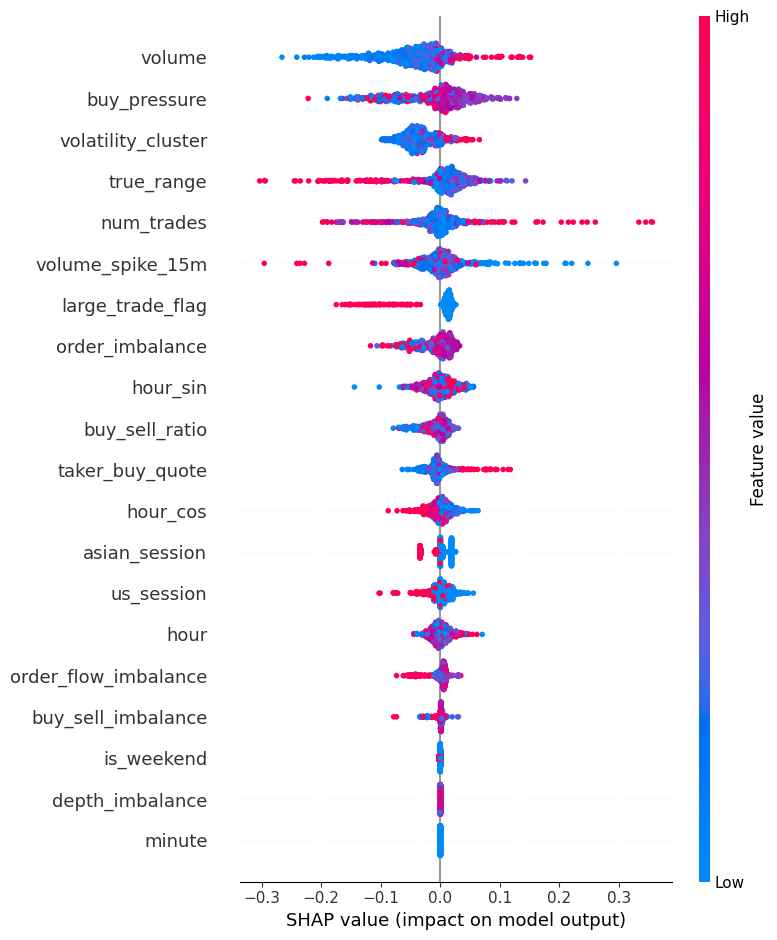

In [5]:
# Plot shap analysis
shap_values = manager.shap_analysis(show_bottom=True, n_features=20)


📈 Calculating feature importance...


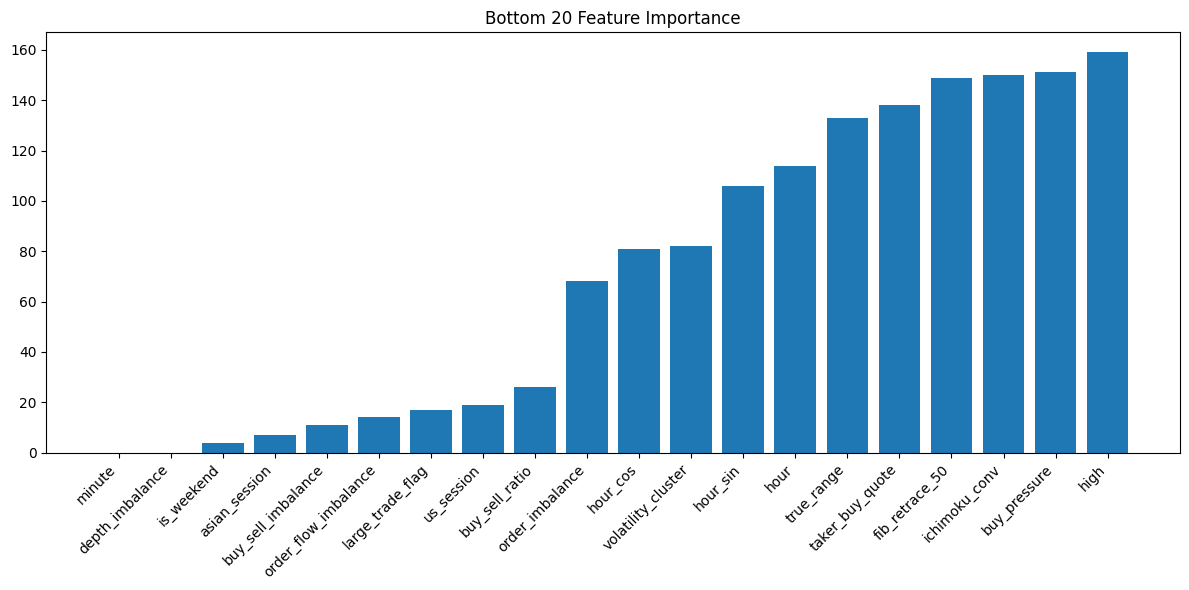

In [6]:
# Plot feature importance
lgbm_values = manager.feature_importance(show_bottom=True, n_features=20)

In [7]:
from utils.model.experiment_tracker import ExperimentTracker

with ExperimentTracker() as tracker:

    # Log experiment details
    experiment = tracker.get_or_create_experiment(
        symbol=symbol,
        frequency="1h",
        target_variable="1h-pump05",
        hyperparameters=manager.model.get_params(),
        features=manager.X_train.columns.tolist()
    )

    # Log experiment results
    results = tracker.log_results(experiment, metrics, test_window_days)

    # Log feature analysis metrics
    tracker.log_feature_importance(experiment, results, shap_values, lgbm_values)

Found existing experiment
Identical result already exists for experiment ID: 11
Logged feature importance for experiment ID: 11


In [ ]:
from utils.model.walk_forward import WalkForwardAnalyzer

# Store original params for logging
org_params = manager.model.get_params()

# Init wf
wf = WalkForwardAnalyzer(
    initial_train_ratio=0.3,
    step_ratio=0.07,
    threshold=manager.optimal_threshold
)

# Config new model for wf
manager.configure_walk_forward_model()

# Define features and labels
X = manager.df.drop(["label"], axis=1)
y = manager.df["label"]

# wf validation
predictions, true_labels, metrics_history = wf.validate(
    model=manager.model,
    X=X,
    y=y,
    timestamp_col="timestamp",
    print_results=True
)

In [ ]:
# Print validation results
wf.plot_metrics_over_time()

In [ ]:
with ExperimentTracker() as tracker:

    # Log experiment details
    experiment = tracker.get_or_create_experiment(
        symbol=symbol,
        frequency="1h",
        target_variable="1h-pump05",
        hyperparameters=org_params,
        features=manager.X_train.columns.tolist()
    )

    # Log wf results
    tracker.log_walk_forward_results(experiment, metrics_history, initial_train_ratio=0.3, step_ratio=0.07)